In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv('/content/Life Expectancy Data.csv')

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

,0
Country,193
Year,16
Status,2
Life expectancy,362
Adult Mortality,425
infant deaths,209
Alcohol,1076
percentage expenditure,2328
Hepatitis B,87
Measles,958


In [11]:
def outliers(data, column):

  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

len_outliers = {}

for i in df.select_dtypes(include=np.number).columns:
  outliers_iqr = outliers(df, i)
  len_outliers[i] = len(outliers_iqr)

len_outliers


{'Year': 0,
 'Life expectancy ': 10,
 'Adult Mortality': 82,
 'infant deaths': 315,
 'Alcohol': 0,
 'percentage expenditure': 389,
 'Hepatitis B': 254,
 'Measles ': 542,
 ' BMI ': 0,
 'under-five deaths ': 394,
 'Polio': 279,
 'Total expenditure': 32,
 'Diphtheria ': 298,
 ' HIV/AIDS': 542,
 'GDP': 365,
 'Population': 294,
 ' thinness  1-19 years': 89,
 ' thinness 5-9 years': 96,
 'Income composition of resources': 130,
 'Schooling': 44}

In [12]:
len_outliers_new = {}

for key, value in len_outliers.items():
  if value > 0 and key != 'Life expectancy ':
    len_outliers_new[key] = value

len_outliers_new

{'Adult Mortality': 82,
 'infant deaths': 315,
 'percentage expenditure': 389,
 'Hepatitis B': 254,
 'Measles ': 542,
 'under-five deaths ': 394,
 'Polio': 279,
 'Total expenditure': 32,
 'Diphtheria ': 298,
 ' HIV/AIDS': 542,
 'GDP': 365,
 'Population': 294,
 ' thinness  1-19 years': 89,
 ' thinness 5-9 years': 96,
 'Income composition of resources': 130,
 'Schooling': 44}

In [14]:
for key, value in len_outliers_new.items():
  fig = px.histogram(
      df,
      x=key,
      nbins=30,
      color_discrete_sequence=['#1f77b4'])

  fig.update_layout(
    showlegend=False,
    xaxis_title=df[key].name,
    yaxis_title="Count",
    bargap=0.1
   )


  fig.show()

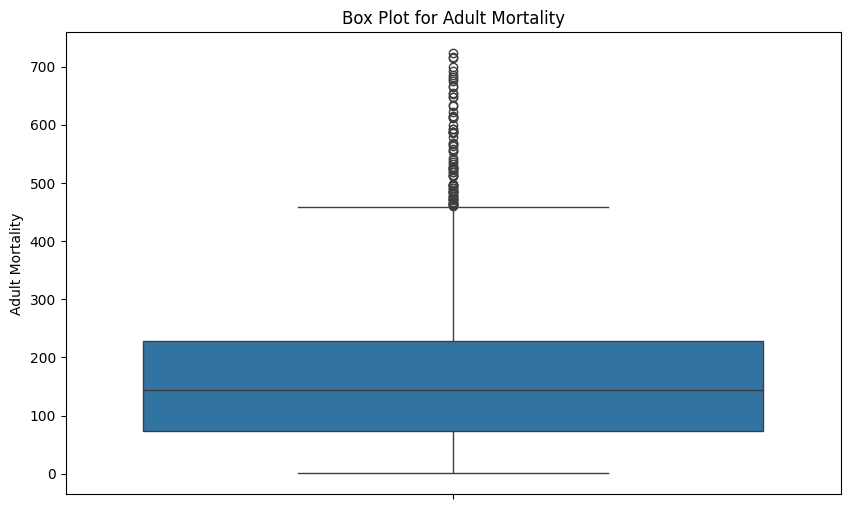

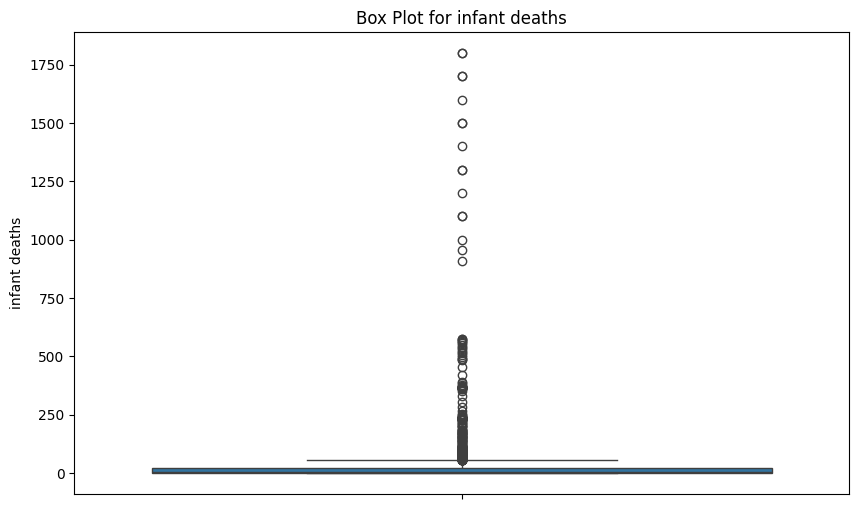

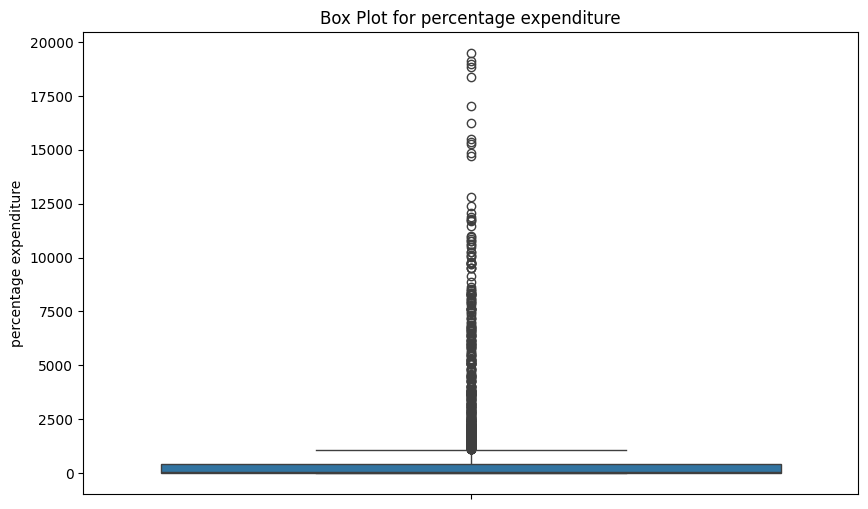

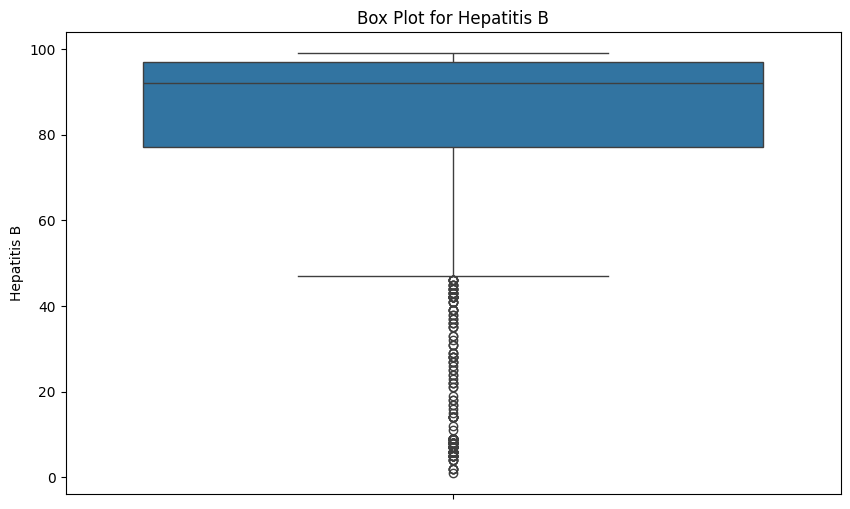

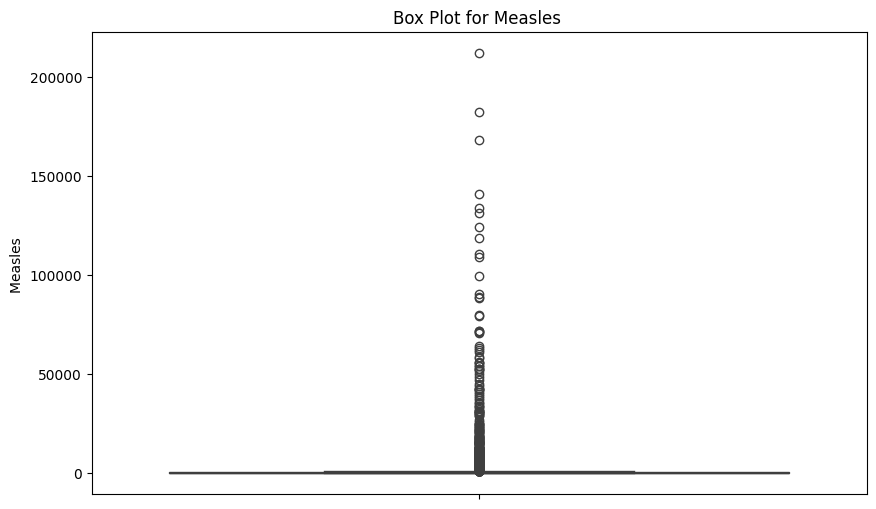

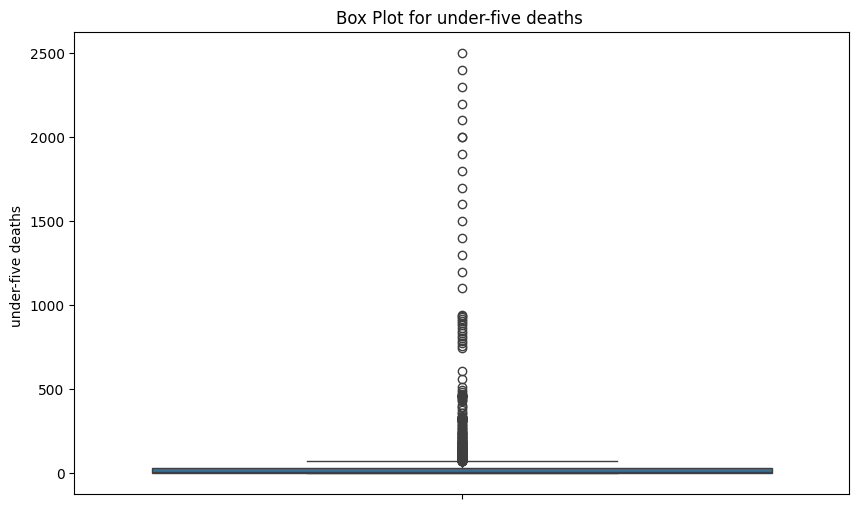

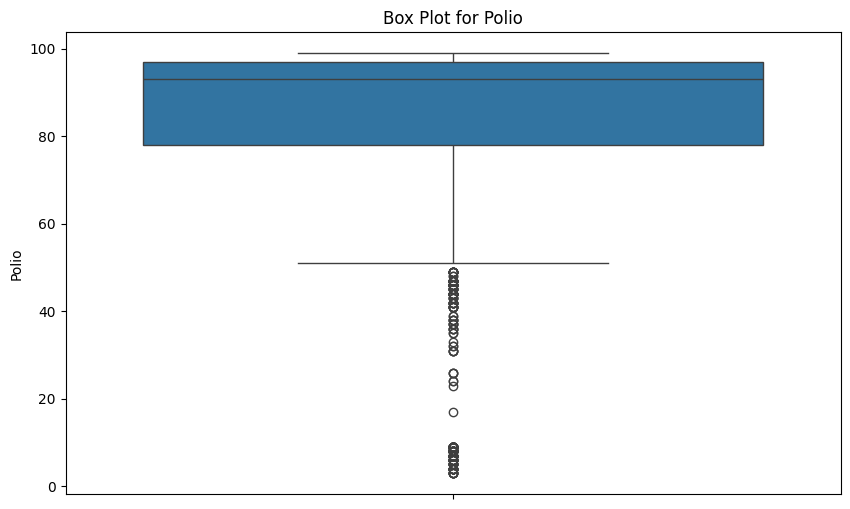

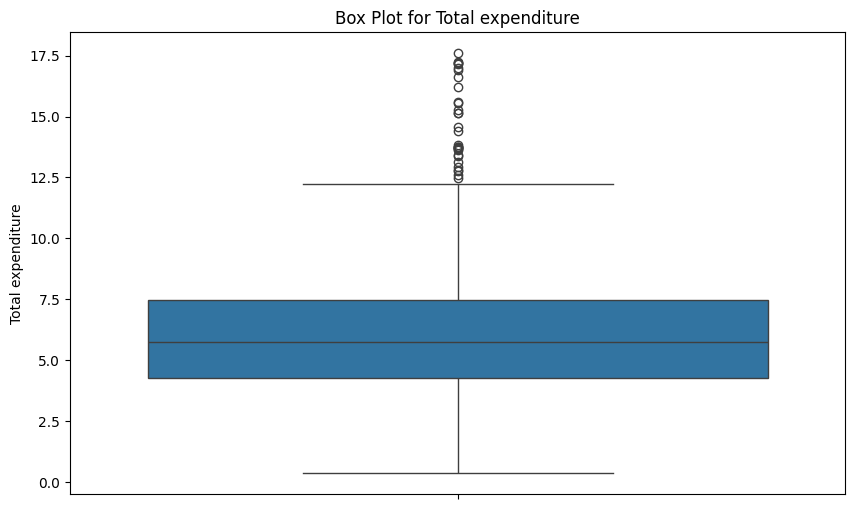

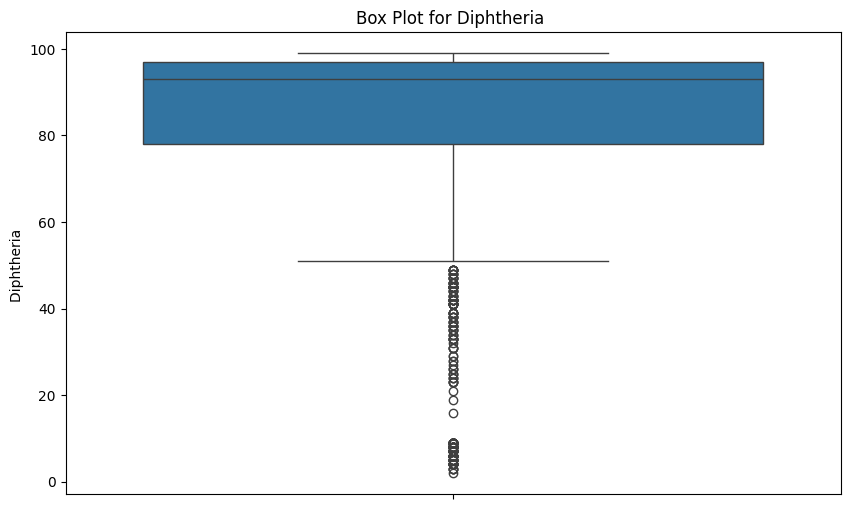

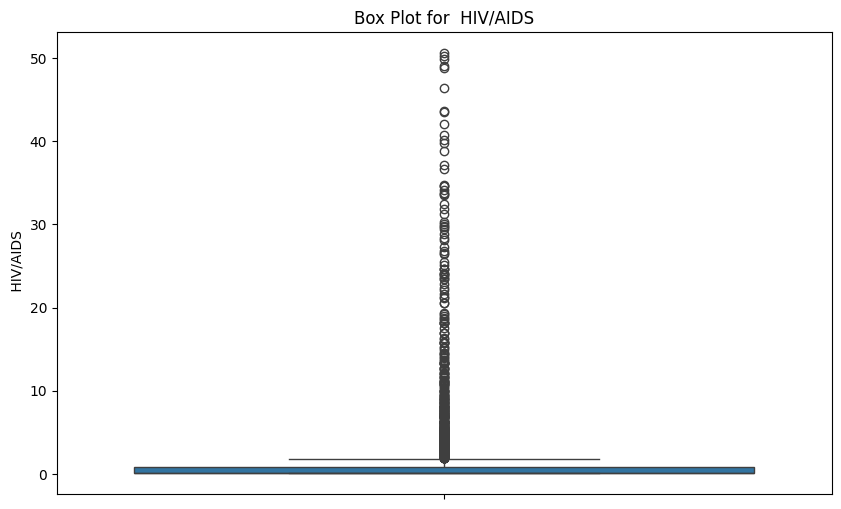

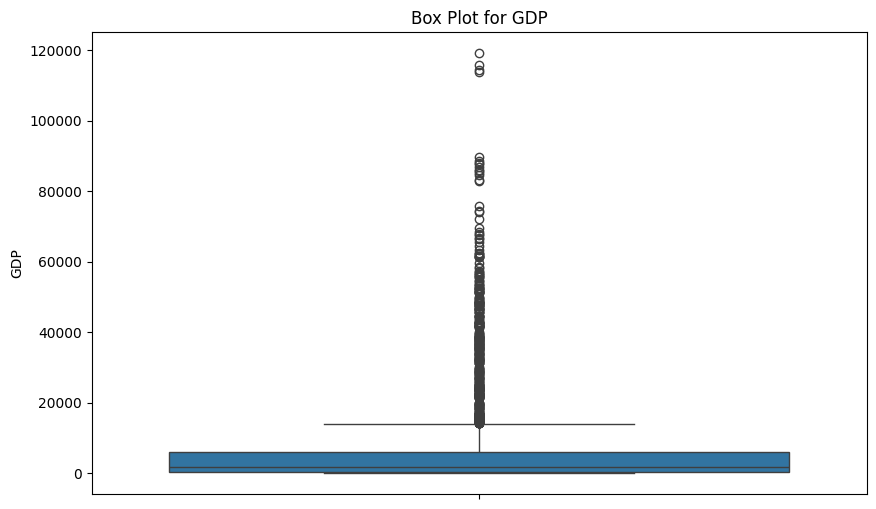

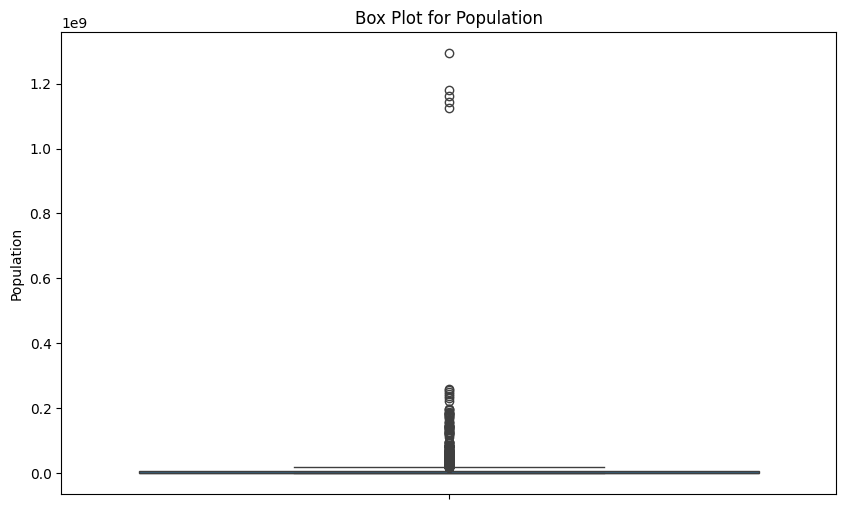

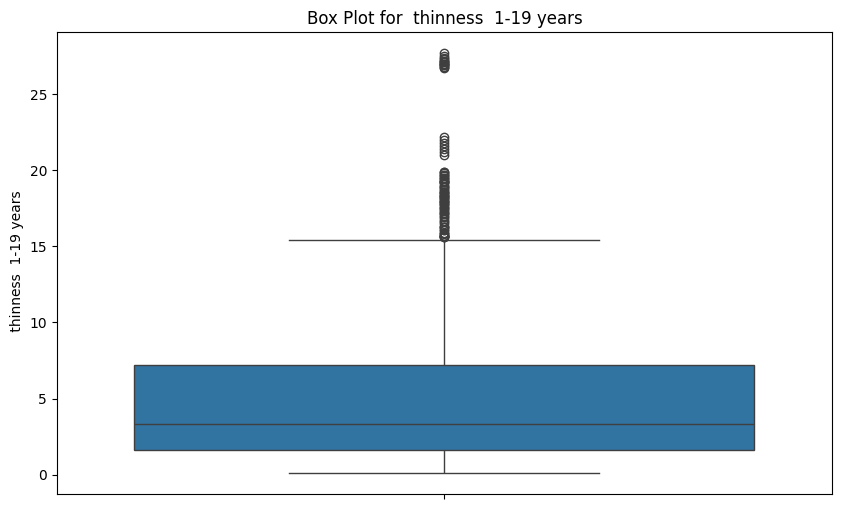

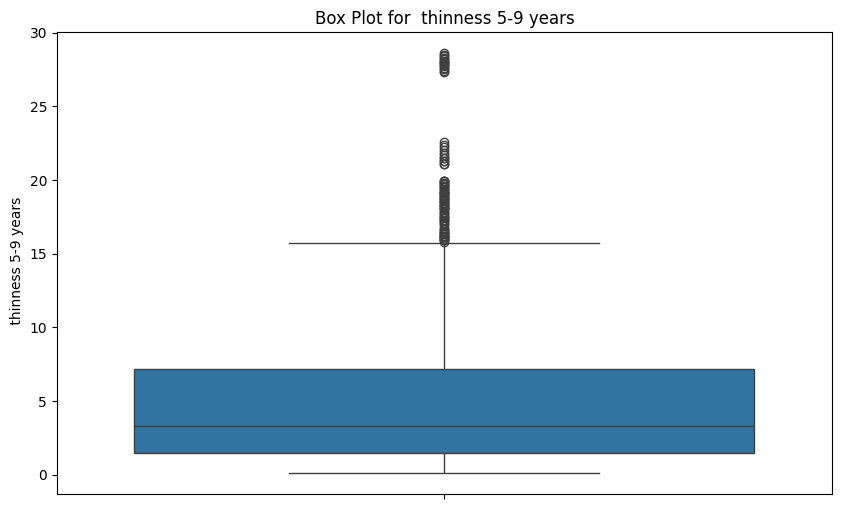

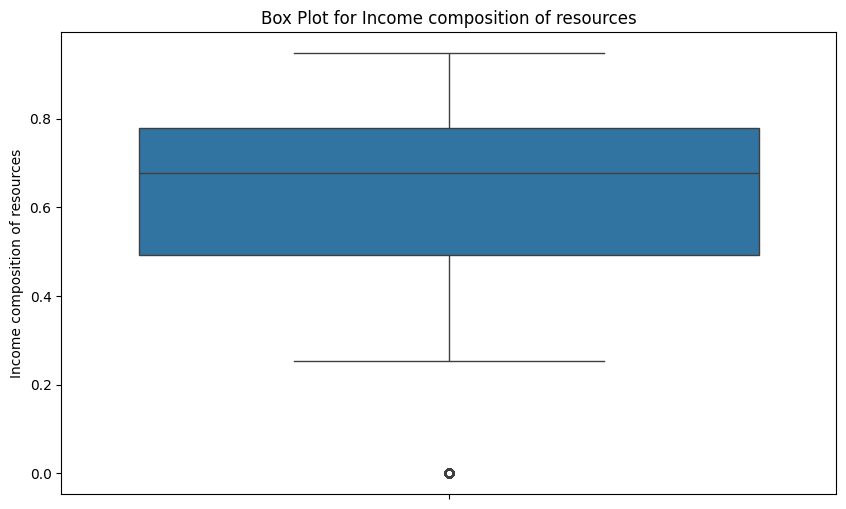

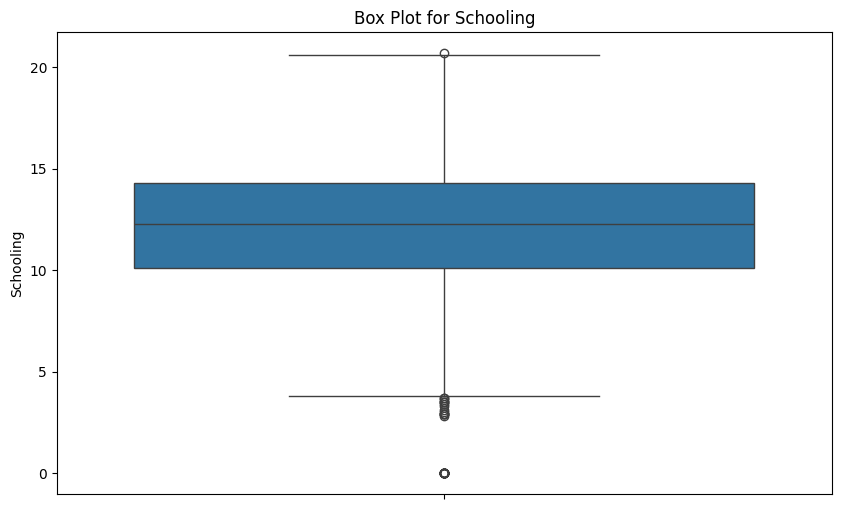

In [15]:
for key, value in len_outliers_new.items():
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        y=key,
        data=df,
        color='#1f77b4'
    )

    plt.title(f'Box Plot for {df[key].name}')
    plt.ylabel(df[key].name)

    plt.show()

#**Scenario 1:**

1) Impute null values with SimpleImpute method: Median method(because of outliers)

2)Solve outliers with **WIN** method

3)Check connection between target columns and independent columns

4)Check correlation among columns

5.1) Scaling data with Standardization method

5.2) Encoding data with frequency and label encoding

6) Use different models for prediction(Linear Regression, TreeRegressor, Bagging, Boosting extc)

7)Measure metrics (MAE, MSE, RMSE, R2): Check overfittig, underfittin as results

8) Use K-fold for each model (Measure main metrics(MAE, R2, MSE, RMSE)

9)Choose best model for prediction and save it



In [129]:
df_s1 = df.copy()

df_s1.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [130]:
df.nunique()

,0
Country,193
Year,16
Status,2
Life expectancy,362
Adult Mortality,425
infant deaths,209
Alcohol,1076
percentage expenditure,2328
Hepatitis B,87
Measles,958


In [131]:
#Check null values
df_s1.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [132]:
df_s1['Life expectancy '].dropna(inplace=True)

In [133]:
df_s1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [134]:
X = df_s1.drop(columns=['Life expectancy '])
y = df_s1['Life expectancy ']


In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [136]:
#Impute null values with Simple impute method with median strategy

from sklearn.impute import SimpleImputer

numerical_col = X_train.select_dtypes(include=['float64', 'int64'])

imputer = SimpleImputer(strategy='median')

X_train[numerical_col.columns] = imputer.fit_transform(X_train[numerical_col.columns])
X_test[numerical_col.columns] = imputer.transform(X_test[numerical_col.columns])

In [137]:
#Check null values again

#X_train.isnull().sum()
X_test.isnull().sum()


,0
Country,0
Year,0
Status,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0


In [138]:
#Check outliers in dataset df_s1

def outliers(data, column):

  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

len_outliers = {}

for i in X_train.select_dtypes(include=np.number).columns:
  outliers_iqr = outliers(df, i)
  len_outliers[i] = len(outliers_iqr)

len_outliers


{'Year': 0,
 'Adult Mortality': 82,
 'infant deaths': 315,
 'Alcohol': 0,
 'percentage expenditure': 389,
 'Hepatitis B': 254,
 'Measles ': 542,
 ' BMI ': 0,
 'under-five deaths ': 394,
 'Polio': 279,
 'Total expenditure': 32,
 'Diphtheria ': 298,
 ' HIV/AIDS': 542,
 'GDP': 365,
 'Population': 294,
 ' thinness  1-19 years': 89,
 ' thinness 5-9 years': 96,
 'Income composition of resources': 130,
 'Schooling': 44}

In [139]:
from scipy.stats import mstats

# Winsorization method for solving outliers problem in the dataset
def winsorize_column(data, column, limits=(0.15, 0.25)):
    """Apply winsorization to handle extreme values"""
    return mstats.winsorize(data[column], limits=limits)

for i in len_outliers_new.keys():
  X_train[i] = winsorize_column(X_train, i)

In [140]:
for i in len_outliers_new.keys():
    fig = px.histogram(X_train, x=i, title=f"Histogram of {i} after Winsorization")
    fig.show()

#**Correlation between different columns:**

1) Life expectancy -> Adult Mortality

2) Life expectancy -> infant deaths

3) Life expectancy -> Alcohol

4) Life expectancy -> Income composition of resources

5) Life expectancy -> Population

6) Life expectancy -> Schooling

7) Life expectancy -> Hepatitis B

In [141]:
# 1)

fig = px.scatter(
    df_s1,
    x="Adult Mortality",
    y="Life expectancy ",
    color="Status",
    hover_name="Country",
    title="Life Expectancy vs. Adult Mortality by Country",
    labels={"Adult Mortality": "Adult Mortality (per 1,000)", "Life expectancy ": "Life Expectancy (years)"},
    template="plotly_dark"
)

# Show the plot
fig.show()


In [142]:
# 2)

fig = px.scatter(
    df_s1,
    x="Adult Mortality",
    y="infant deaths",
    color="Status",
    hover_name="Country",
    title="Adult Mortality vs. Infant Deaths by Country",
    labels={"Adult Mortality": "Adult Mortality (per 1,000)", "infant deaths": "Infant Deaths (per 1,000)"},
    template="plotly_dark"
)

fig.show()


In [143]:
# 3)

fig = px.scatter(
    df_s1,
    x="Adult Mortality",
    y="Alcohol",  # Updated to Alcohol
    color="Status",
    hover_name="Country",
    title="Adult Mortality vs. Alcohol Consumption by Country",  # Updated title
    labels={"Adult Mortality": "Adult Mortality (per 1,000)", "Alcohol": "Alcohol Consumption (liters/year)"},
    template="plotly_dark"
)

fig.show()


In [144]:
# 4)

fig = px.scatter(
    df_s1,
    x="Adult Mortality",
    y="Income composition of resources",  # Updated to Income composition of resources
    color="Status",
    hover_name="Country",
    title="Adult Mortality vs. Income Composition of Resources by Country",  # Updated title
    labels={"Adult Mortality": "Adult Mortality (per 1,000)", "Income composition of resources": "Income Composition of Resources"},
    template="plotly_dark"
)

fig.show()


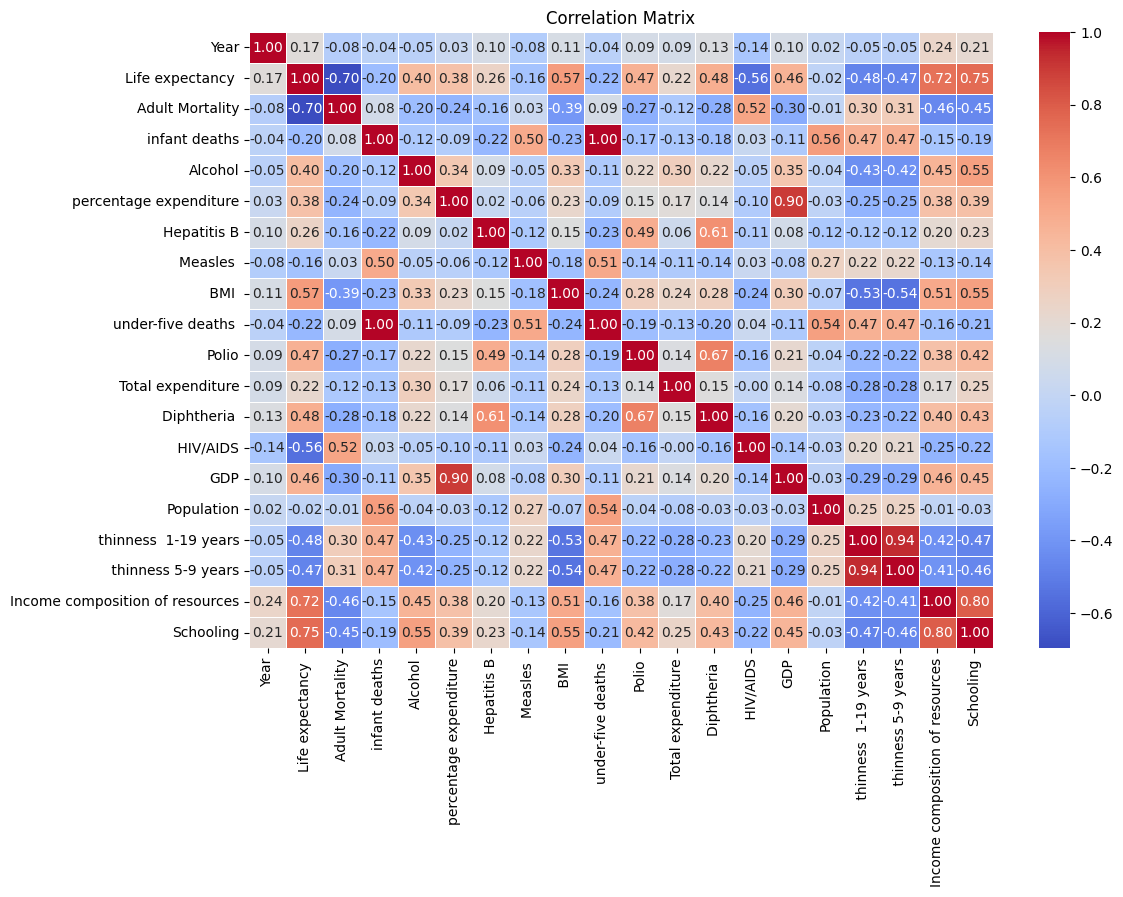

In [145]:
numerical_col = df_s1.select_dtypes(include=['float64', 'int64'])

corr = numerical_col.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Multicolineartiy between different columns:

1)thinnees 1-19 year -> thinness 5-9 years

2)GDP -> percentage expenditure

3)under-five deaths -> infant deaths

In [146]:
# 1) thinnees 1-19 year -> thinness 5-9 years

# Impute missing GDP values with the median
df_s1['GDP'].fillna(df_s1['GDP'].median(), inplace=True)

fig = px.scatter(
    df_s1,
    x=" thinness  1-19 years",
    y="Life expectancy ",
    color="Status",
    size="GDP",
    hover_name="Country",
    template="plotly_dark"
)
fig.show()


fig = px.scatter(
    df_s1,
    x=" thinness 5-9 years",
    y="Life expectancy ",
    color="Status",
    size="GDP",
    hover_name="Country",
    template="plotly_dark"
)
fig.show()

/tmp/ipython-input-3281817157.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [147]:
# Result: Delete thinness 5-9 years column from dataset:

X_train.drop(columns=[' thinness 5-9 years'], inplace=True)
X_test.drop(columns=[' thinness 5-9 years'], inplace=True)

In [148]:
df_s1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [149]:
#2)GDP -> percentage expenditure


fig = px.scatter(
    df_s1,
    x=" thinness  1-19 years",
    y="GDP",
    color="Status",
    size="GDP",
    hover_name="Country",
    template="plotly_dark"
)
fig.show()


fig = px.scatter(
    df_s1,
    x=" thinness 5-9 years",
    y="percentage expenditure",
    color="Status",
    size="GDP",
    hover_name="Country",
    template="plotly_dark"
)
fig.show()


In [150]:
X_train.drop(columns=['percentage expenditure'], inplace=True)
X_test.drop(columns=['percentage expenditure'], inplace=True)

In [151]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [152]:
#3)under-five deaths -> infant deaths

X_train.drop(columns=['under-five deaths '], inplace=True)
X_test.drop(columns=['under-five deaths '], inplace=True)

In [153]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train[X_train.select_dtypes(include=np.number).columns] = scale.fit_transform(X_train.select_dtypes(include=np.number))
X_test[X_test.select_dtypes(include=np.number).columns] = scale.transform(X_test.select_dtypes(include=np.number))

In [154]:
#Encoding frequency


country_freq = X_train['Country'].value_counts()
country_freq1 = X_test['Country'].value_counts()

X_train['Country'] = X_train['Country'].map(country_freq)
X_test['Country'] = X_test['Country'].map(country_freq1)

In [155]:
X_test.isnull().sum()

,0
Country,0
Year,0
Status,0
Adult Mortality,0
infant deaths,0
Alcohol,0
Hepatitis B,0
Measles,0
BMI,0
Polio,0


In [156]:
#Encoding one-hot

X_train = pd.get_dummies(X_train, columns=['Status'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Status'], drop_first=True)

In [159]:
X_train.head(5)

,Country,Year,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling,Status_Developing
2737,15,0.093844,1.225798,-0.319984,1.257523,-0.352042,-0.465399,0.951361,0.340902,0.706419,-1.839809,0.292660,0.882928,-0.885960,-0.593369,0.709646,1.116109,True
789,13,0.965236,-0.192548,-0.090554,-0.159584,0.047314,-0.313372,0.676893,-0.179847,0.598966,-0.003453,-0.703832,-0.999724,1.492717,-1.089175,0.606242,0.696082,True
707,14,1.183084,0.074269,-0.205269,-0.305387,0.546508,-0.769452,-0.336141,0.861651,0.061698,0.521220,-0.703832,-0.294788,-0.342548,0.439560,0.327845,0.223551,True
424,12,-0.124004,1.225798,1.515461,-0.000990,0.846025,-0.497071,-1.184494,0.514485,-1.499959,0.871002,1.621316,-1.134166,1.492717,1.307220,-1.597072,-1.614070,True
69,13,0.529540,-0.038075,-0.893561,0.843134,0.846025,-0.769452,0.292639,0.861651,-0.009937,0.871002,-0.703832,1.394126,-0.342548,-0.262832,1.043723,1.116109,True


In [177]:
from sklearn.impute import SimpleImputer

imputer_y = SimpleImputer(strategy='median')
y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = imputer_y.transform(y_test.values.reshape(-1, 1)).ravel()

imputer_X_numerical = SimpleImputer(strategy='median')
numerical_cols_X_train = X_train.select_dtypes(include=np.number).columns
X_train[numerical_cols_X_train] = imputer_X_numerical.fit_transform(X_train[numerical_cols_X_train])
X_test[numerical_cols_X_train] = imputer_X_numerical.transform(X_test[numerical_cols_X_train])

In [162]:



lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R-squared (R²):", r2_score(y_test, y_pred_lr))

Linear Regression Metrics:
Mean Absolute Error (MAE): 24.218468551525934
Mean Squared Error (MSE): 3617.417426021879
Root Mean Squared Error (RMSE): 60.1449700808129
R-squared (R²): -39.1592076449913


In [178]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets


y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [179]:
print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 3.0748344669327556
MSE: 16.708131274058047
RMSE: 4.087558106505404
R²: 0.815264371444334

Test Data Evaluation Metrics:
MAE: 24.218468551525934
MSE: 3617.417426021879
RMSE: 60.1449700808129
R²: -39.1592076449913


##Check dataset with **Tree ML model**

In [164]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Regressor Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_dt))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_dt))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R-squared (R²):", r2_score(y_test, y_pred_dt))


Decision Tree Regressor Metrics:
Mean Absolute Error (MAE): 2.123401360544218
Mean Squared Error (MSE): 12.015959183673468
Root Mean Squared Error (RMSE): 3.4664043595162797
R-squared (R²): 0.8666033407038813


In [166]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [167]:
print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

#Overfitting !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Training Data Evaluation Metrics:
MAE: 9.676024545076262e-18
MSE: 6.875228951540366e-32
RMSE: 2.6220657794075966e-16
R²: 1.0

Test Data Evaluation Metrics:
MAE: 2.123401360544218
MSE: 12.015959183673468
RMSE: 3.4664043595162797
R²: 0.8666033407038813


##**Check dataset with Random Forest Regressor**

In [168]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Regressor Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R-squared (R²):", r2_score(y_test, y_pred_rf))


Random Forest Regressor Metrics:
Mean Absolute Error (MAE): 1.4590911564625826
Mean Squared Error (MSE): 4.7871713578231265
Root Mean Squared Error (RMSE): 2.187960547592924
R-squared (R²): 0.9468546241835318


In [169]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 0.5236536541080322
MSE: 0.7320275655923728
RMSE: 0.8555860947867098
R²: 0.991906241923072

Test Data Evaluation Metrics:
MAE: 1.4590911564625826
MSE: 4.7871713578231265
RMSE: 2.187960547592924
R²: 0.9468546241835318


##Check dataset with **Boosting Regressor**(Boosting) model

In [171]:
# Gradient Boosting Regressor (Boosting)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Regressor Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_gb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R-squared (R²):", r2_score(y_test, y_pred_gb))


Gradient Boosting Regressor Metrics:
Mean Absolute Error (MAE): 1.8776200883086165
Mean Squared Error (MSE): 6.920012620930062
Root Mean Squared Error (RMSE): 2.630591686470947
R-squared (R²): 0.9231766227058005


In [173]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [174]:
print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 1.6606510907276197
MSE: 5.520897807801743
RMSE: 2.349659083314374
R²: 0.938957474657898

Test Data Evaluation Metrics:
MAE: 1.8776200883086165
MSE: 6.920012620930062
RMSE: 2.630591686470947
R²: 0.9231766227058005


##**Check the dataset with LGBMRegressor ML model**

In [175]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse",
    callbacks=[]
)

y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Regressor Metrics:")
mae = mean_absolute_error(y_test, y_pred_lgbm)
mse = mean_squared_error(y_test, y_pred_lgbm)
rmse = np.sqrt(mse)
r2  = r2_score(y_test, y_pred_lgbm)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2006
[LightGBM] [Info] Number of data points in the train set: 2203, number of used features: 18
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 69.354426
LightGBM Regressor Metrics:
Mean Absolute Error (MAE): 1.3606708298342338
Mean Squared Error (MSE): 4.194679321169607
Root Mean Squared Error (RMSE): 2.0480916290951456
R-squared (R²): 0.9534322479205134


In [176]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [177]:
print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 0.13669296038124096
MSE: 0.046696894432464914
RMSE: 0.21609464230393338
R²: 0.9994836897075394

Test Data Evaluation Metrics:
MAE: 1.3606708298342338
MSE: 4.194679321169607
RMSE: 2.0480916290951456
R²: 0.9534322479205134


#**Scenario 2:**

1) Impute null values with KNN method

2)Don't solve outliers problem

2.1)Don't solve multicolinaity problem

3)Scaling data with Robotus scaling

4.1)Encoding 'Country' with frequency encoding

4.2)Encoding others column with one-hot encoding

5) Use different model which they are working with data include outliers

6)Measure metrics(MAE, MSE, RMSE, R2)

6.1) Check overfitting, underfitting as results

7)Use K-fold techniques

8)Choose best model for prediction

In [9]:
df_s2 = df.copy()

In [10]:
df_s2.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
df_s2.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [15]:
#Seperate dependent and independent columns

X = df_s2.drop("Life expectancy ", axis=1)
y = df_s2['Life expectancy ']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

numerical_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(include='object').columns

imputer = KNNImputer(n_neighbors=5)
X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

imputer_y = SimpleImputer(strategy='median')
y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = imputer_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [22]:
#Encoding frequency

country_freq = X_train['Country'].value_counts()
country_freq1 = X_test['Country'].value_counts()

X_train['Country'] = X_train['Country'].map(country_freq)
X_test['Country'] = X_test['Country'].map(country_freq1)

In [23]:
#Encoding one-hot

X_train = pd.get_dummies(X_train, columns=['Status'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Status'], drop_first=True)

In [25]:
X_train.head(5)

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
2737,15,0.000,0.840391,0.095238,0.880371,0.898283,-0.351759,0.087312,0.375510,0.076923,-0.105263,0.272436,-4.421053,0.461538,0.449799,-0.207065,-0.145455,-0.125000,0.185714,0.609756,True
789,13,0.500,-0.110749,0.190476,0.024111,-0.057273,-0.150754,0.152797,0.225850,0.153846,-0.421053,0.224359,-0.315789,0.000000,-0.221352,1.766981,-0.363636,-0.375000,0.139286,0.219512,True
707,14,0.625,0.013029,0.142857,-0.063988,-0.153804,0.100503,-0.043656,-0.326531,0.153846,0.315789,0.474359,0.000000,0.000000,0.525732,-0.224317,0.309091,0.303571,0.196429,0.209756,True
424,12,-0.125,1.374593,1.000000,0.119938,-0.149824,0.402010,0.073670,-0.789116,1.230769,0.000000,-1.435897,0.315789,5.076923,-0.333440,0.779753,0.854545,0.839286,-1.317857,-1.268293,True
69,13,0.250,-0.039088,-0.142857,0.629985,4.419000,0.351759,-0.043656,0.016327,-0.153846,0.315789,-0.048077,0.263158,0.000000,2.115020,-0.055386,0.000000,0.000000,0.375000,0.414634,True


##**Check the dataset with LGBMRegressor ML model**

In [24]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lgbm = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse",
    callbacks=[]
)

y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Regressor Metrics:")
mae = mean_absolute_error(y_test, y_pred_lgbm)
mse = mean_squared_error(y_test, y_pred_lgbm)
rmse = np.sqrt(mse)
r2  = r2_score(y_test, y_pred_lgbm)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3456
[LightGBM] [Info] Number of data points in the train set: 2203, number of used features: 21
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 69.354426
LightGBM Regressor Metrics:
Mean Absolute Error (MAE): 6.679348610389466
Mean Squared Error (MSE): 65.81256947190644
Root Mean Squared Error (RMSE): 8.112494651579528
R-squared (R²): 0.2693736077953197


In [26]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [27]:
print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 0.08398543912151327
MSE: 0.0176802496058443
RMSE: 0.1329670997120878
R²: 0.9998045160185551

Test Data Evaluation Metrics:
MAE: 6.679348610389466
MSE: 65.81256947190644
RMSE: 8.112494651579528
R²: 0.2693736077953197


##Check dataset with **Boosting Regressor**(Boosting) model

In [28]:
# Gradient Boosting Regressor (Boosting)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Regressor Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_gb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R-squared (R²):", r2_score(y_test, y_pred_gb))


Gradient Boosting Regressor Metrics:
Mean Absolute Error (MAE): 9.174243138787425
Mean Squared Error (MSE): 112.33346603145839
Root Mean Squared Error (RMSE): 10.598748323809675
R-squared (R²): -0.24708388791059832


In [35]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 1.3585502738700155
MSE: 3.562281179055613
RMSE: 1.887400640843277
R²: 0.960613174393319

Test Data Evaluation Metrics:
MAE: 9.174243138787425
MSE: 112.33346603145839
RMSE: 10.598748323809675
R²: -0.24708388791059832


In [36]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R-squared (R²):", r2_score(y_test, y_pred_lr))

Linear Regression Metrics:
Mean Absolute Error (MAE): 377923.2457213619
Mean Squared Error (MSE): 3475793479370.228
Root Mean Squared Error (RMSE): 1864348.0038260636
R-squared (R²): -38586951857.25964


In [37]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 2.9336129202689127
MSE: 15.427287166274029
RMSE: 3.9277585422571524
R²: 0.8294261910668962

Test Data Evaluation Metrics:
MAE: 377923.2457213619
MSE: 3475793479370.228
RMSE: 1864348.0038260636
R²: -38586951857.25964
